In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('Bitcoin_tweets.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 KB 672.7 kB/s eta 0:00:00


In [3]:
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt


In [7]:
tweets_raw_file   = pd.read_csv('Bitcoin_tweets.csv')

In [9]:
tweets_clean_file = pd.read_csv('C://Users//Asus//Downloads//Bitcoin_tweets_clean.csv')

In [11]:
bit_price_file2 = pd.read_csv('C://Users//Asus//Downloads//BTC-USD.csv') 

In [13]:
df_raw = tweets_raw_file
print(df_raw.shape)
df_raw.head(5)

(3029118, 13)


user_name    user_location  \
0                             DeSota Wilson      Atlanta, GA   
1                                  CryptoND              NaN   
2                                 Tdlmatias  London, England   
3                      Crypto is the future              NaN   
4  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description         user_created  \
0  Biz Consultant, real estate, fintech, startups...  2009-04-26 20:05:09   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  2019-10-17 20:12:10   
2  IM Academy : The best #forex, #SelfEducation, ...  2014-11-10 10:50:37   
3  I will post a lot of buying signals for BTC tr...  2019-09-28 16:48:12   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...  2016-02-03 13:15:55   

  user_followers user_friends user_favourites user_verified  \
0         8534.0         7605            4838         False   
1         6769.0         1532           25483         False   
2          128.0          332             924         False   
3          625.0          129              14         False   
4         1249.0         1472           10482         False   

                  date                                               text  \
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...   
1  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...   
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...   
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...   
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source is_retweet  
0                                ['bitcoin']      Twitter Web App      False  
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False  
2                                        NaN      Twitter Web App      False  
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it      False  
4                                    ['BTC']      Twitter Web App      False

In [21]:
##import unicodedata
##unicodedata.normalize('NFKD', df_raw.text).encode('ascii','ignore')

TypeError: normalize() argument 2 must be str, not Series

In [22]:
# clean df 
df_raw = df_raw.sort_values(by = 'date')
dd = df_raw.sample(frac=0.01, replace=False, random_state=1)
dd.reset_index(inplace=True)
for i,s in enumerate(tqdm(dd['text'],position=0, leave=True)):
    text = str(dd.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    dd.loc[i, 'text'] = text
#f = open(tweets_clean_file, 'a+', encoding='utf-8')

100%|████████████████████████████████████████████████████████████████████████████| 30291/30291 [20:46<00:00, 24.30it/s]


In [28]:
df_clean = pd.read_csv(f'C://Users//Asus//Downloads//Bitcoin_tweets_clean.csv')

In [29]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df_clean['text'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
df_clean["compound"] = compound
df_clean.head(2)

100%|██████████████████████████████████████████████████████████████████████████| 22598/22598 [00:11<00:00, 1911.31it/s]


index                        user_name user_location  \
0   195760                             محمد       esfahan   
1  1135874  Crypto Revolution Merchandise 💚           NaN   

                                    user_description         user_created  \
0            ‏‏‏خودت رو به خودت ثابت کن،نه به دیگران  2021-01-02 19:08:56   
1  Crypto Revolution the Wave of change 👊😎👊 Not y...  2019-10-13 06:16:05   

   user_followers  user_friends  user_favourites user_verified  \
0           616.0        1683.0           1712.0         False   
1           451.0        2045.0          45077.0         False   

                  date                                               text  \
0  2021-06-22 05:22:52  nice project \n\n\n\n\n\nortcoin ort okratech ...   
1  2021-08-25 07:06:40                     Long Bitcoin short the banks 🧐   

                                            hashtags               source  \
0  ['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...  Twitter for Android   
1                                        ['Bitcoin']      Twitter Web App   

  is_retweet  compound  
0      False    0.5994  
1      False    0.0000

In [30]:
scores = []
for i, s in tqdm(df_clean.iterrows(), total=df_clean.shape[0],position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
df_clean["score"] = scores
df_clean.head(2)

100%|██████████████████████████████████████████████████████████████████████████| 22598/22598 [00:06<00:00, 3661.74it/s]


index                        user_name user_location  \
0   195760                             محمد       esfahan   
1  1135874  Crypto Revolution Merchandise 💚           NaN   

                                    user_description         user_created  \
0            ‏‏‏خودت رو به خودت ثابت کن،نه به دیگران  2021-01-02 19:08:56   
1  Crypto Revolution the Wave of change 👊😎👊 Not y...  2019-10-13 06:16:05   

   user_followers  user_friends  user_favourites user_verified  \
0           616.0        1683.0           1712.0         False   
1           451.0        2045.0          45077.0         False   

                  date                                               text  \
0  2021-06-22 05:22:52  nice project \n\n\n\n\n\nortcoin ort okratech ...   
1  2021-08-25 07:06:40                     Long Bitcoin short the banks 🧐   

                                            hashtags               source  \
0  ['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...  Twitter for Android   
1                                        ['Bitcoin']      Twitter Web App   

  is_retweet  compound        score  
0      False    0.5994  1025.108064  
1      False    0.0000     0.000000

In [33]:
df_price = pd.read_csv('C://Users//Asus//Downloads//BTC-USD.csv')
df_price.Date = pd.to_datetime(df_price.Date)
# df_price.Timestamp = pd.to_datetime(df_price.Timestamp,unit='s')
df_price.head(2)

Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   

     Volume  
0  21056800  
1  34483200

In [34]:
# sentiment analysis 
df_clean = df_clean.drop_duplicates()
tweets = df_clean.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

# tweets_grouped = tweets.groupby(pd.TimeGrouper('1h'))['score'].sum()
tweets_grouped = tweets.resample('1h').sum()

crypto_usd = df_price.copy()
crypto_usd['Date'] = pd.to_datetime(crypto_usd['Date'], unit='s')
crypto_usd.index = crypto_usd['Date']
# crypto_usd['Timestamp'] = pd.to_datetime(crypto_usd['Timestamp'], unit='s')
# crypto_usd.index = crypto_usd['Timestamp']

# crypto_usd_grouped = crypto_usd.groupby(pd.TimeGrouper('1h'))['Weighted_Price'].mean()
crypto_usd_grouped = crypto_usd.resample('D')['Close'].mean()

In [35]:
def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation. 
    Parameters
    —------—
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    —------—
    crosscorr : float
    """
    return datax.corrwith(datay.shift(lag), method=method)['score']
# xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, m ='pearson' ) for i in range(-20,20)]
# tweets_grouped.corrwith(crypto_usd_grouped,method='pearson')

In [36]:
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

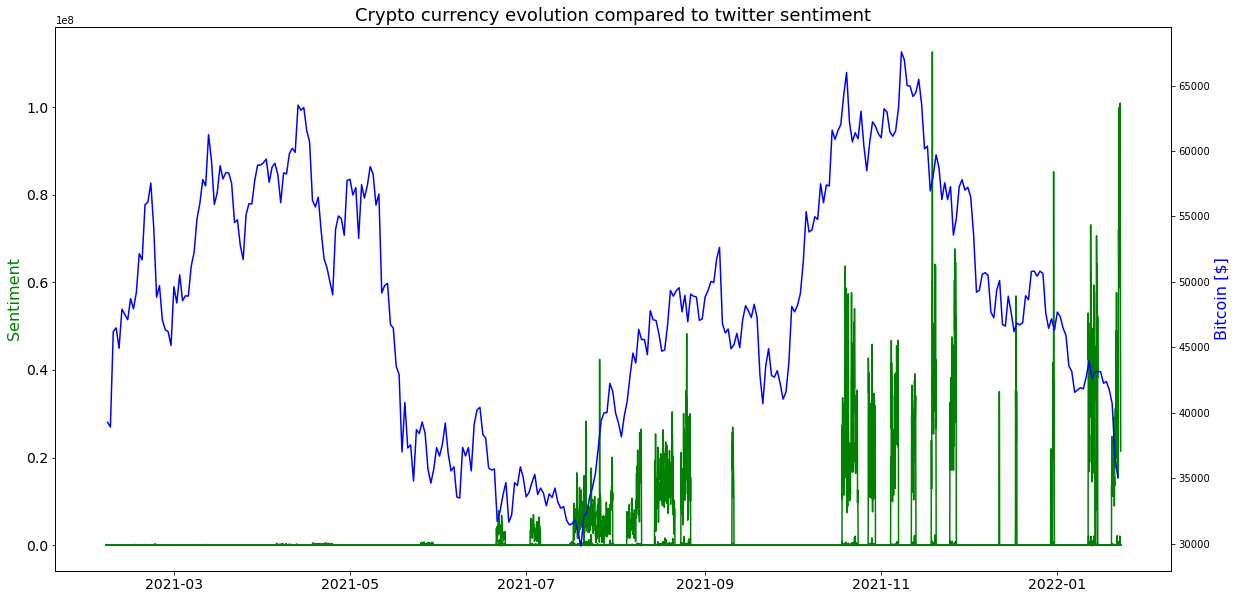

In [37]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
plt.show()

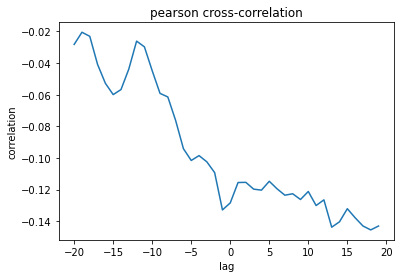

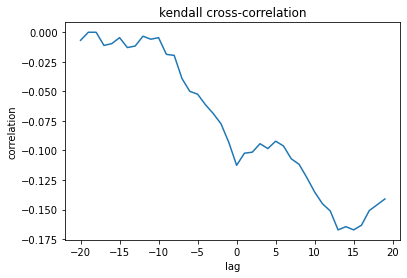

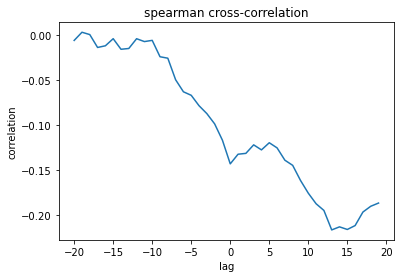

In [38]:
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

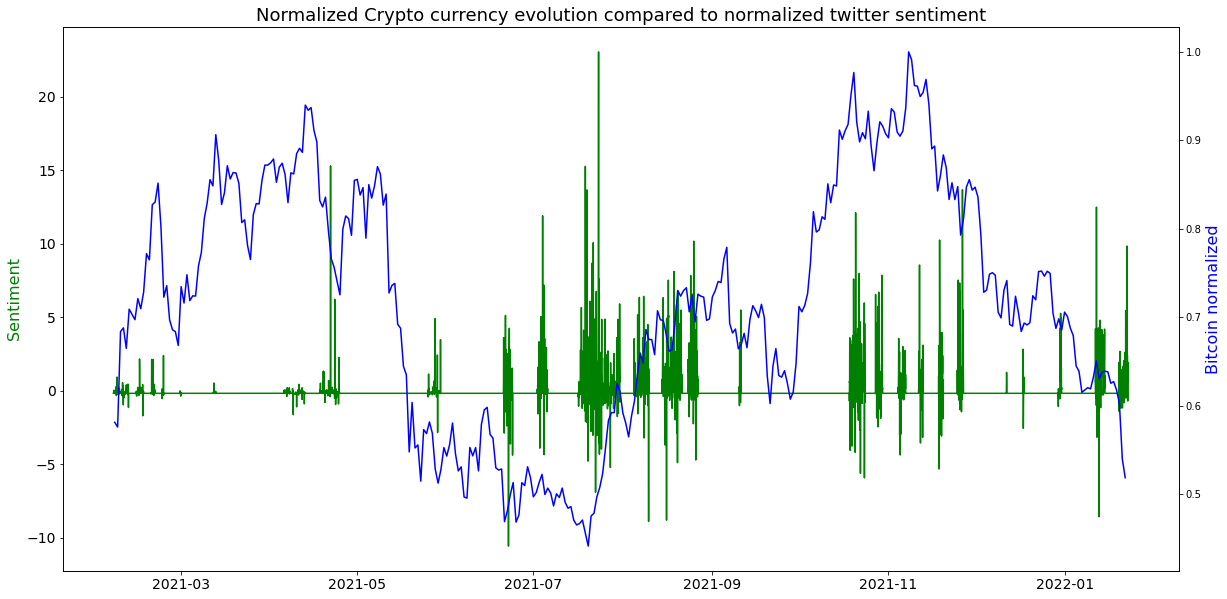

In [39]:
# Normalize time series data
min_max_scaler = preprocessing.StandardScaler()
score_scaled = min_max_scaler.fit_transform(tweets_grouped['score'].values.reshape(-1,1))
tweets_grouped['normalized_score'] = score_scaled
# crypto_used_grouped_scaled = min_max_scaler.fit_transform(crypto_usd_grouped.values.reshape(-1,1))
crypto_used_grouped_scaled = crypto_usd_grouped / max(crypto_usd_grouped.max(), abs(crypto_usd_grouped.min()))
# crypto_usd_grouped['normalized_price'] = crypto_used_grouped_scaled

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Normalized Crypto currency evolution compared to normalized twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped['normalized_score'], 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_used_grouped_scaled, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin normalized", color='b', fontsize=16)
plt.show()


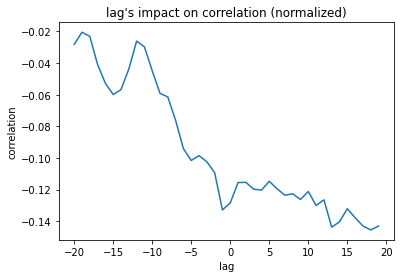

In [40]:
#tweets_grouped.T.corr(crypto_usd_grouped, method='pearson')
#tweets_grouped.T.autocorr(crypto_usd_grouped, lag=20)
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i) for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("lag's impact on correlation (normalized)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

In [41]:
# Derivative
tweets_grouped_derivative = pd.Series(np.gradient(tweets_grouped['normalized_score'].values), tweets_grouped.index, name='slope')
crypto_usd_grouped_derivative = pd.Series(np.gradient(crypto_usd_grouped.values), crypto_usd_grouped.index, name='slope')

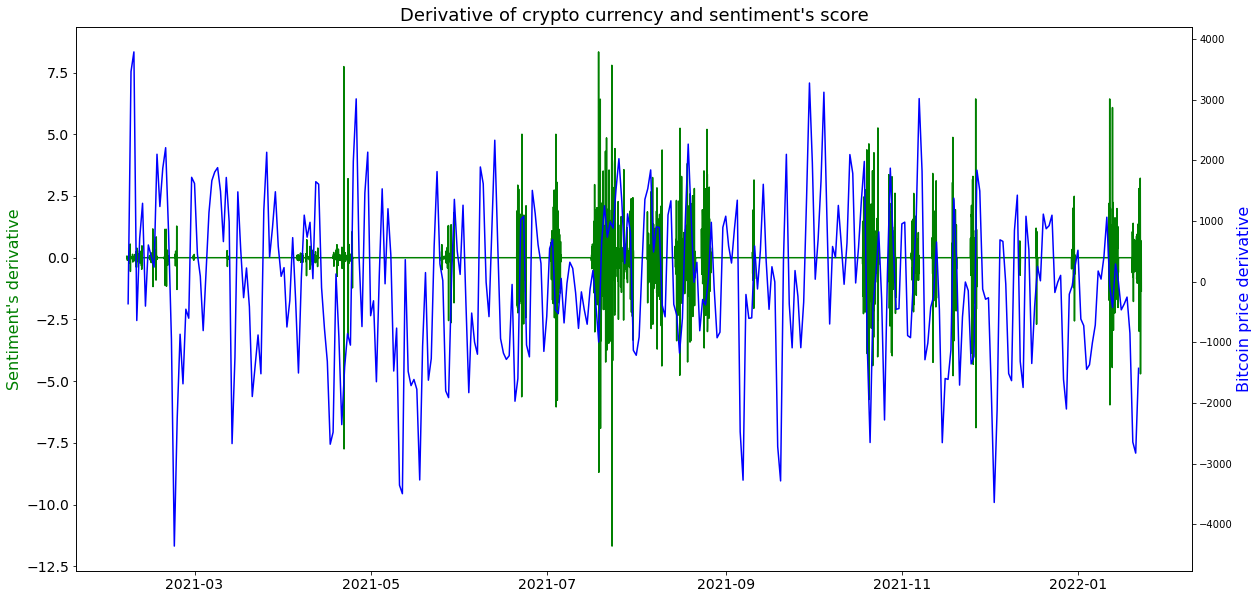

In [42]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Derivative of crypto currency and sentiment's score", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped_derivative.index, tweets_grouped_derivative, 'g-')
ax2.plot_date(crypto_usd_grouped_derivative.index, crypto_usd_grouped_derivative, 'b-')

ax1.set_ylabel("Sentiment's derivative", color='g', fontsize=16)
ax2.set_ylabel('Bitcoin price derivative', color='b', fontsize=16)
plt.show()

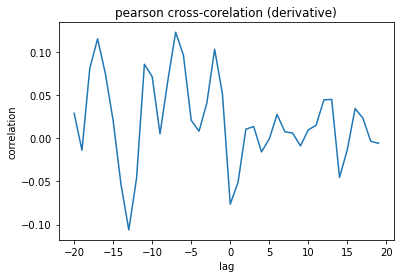

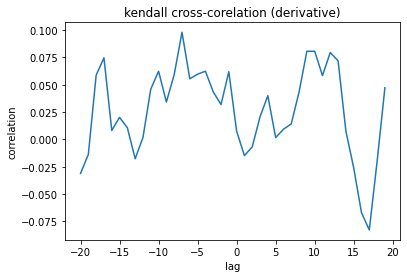

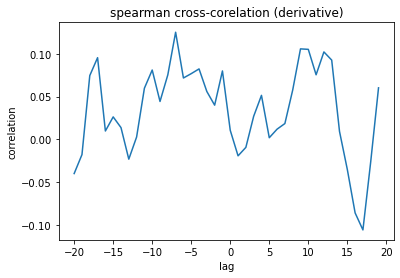

In [43]:
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped_derivative, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-corelation (derivative)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped_derivative, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-corelation (derivative)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped_derivative, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-corelation (derivative)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

In [44]:
!pip install textblob

     -------------------------------------- 636.8/636.8 KB 3.3 MB/s eta 0:00:00


In [45]:
from textblob import TextBlob

df = df_clean.copy()
df.dropna(subset=['hashtags'], inplace=True)
df = df[['text']] 
df.columns = ['tweets']
df.head()

tweets
0  nice project \n\n\n\n\n\nortcoin ort okratech ...
1                     Long Bitcoin short the banks 🧐
2  Top Trending Cryptocurrency Post - DOGECOIN Se...
3  Can one expect another wave of BTC's decline s...
4  We will see…\n\nbitcoin btc bnb band bake $btc...

In [46]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])

print(stop_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [47]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)

In [48]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df['date'] = df_clean['date']
df['date_clean'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df.drop(columns='date',inplace=True)
df.head()

tweets  \
0  nice project \n\n\n\n\n\nortcoin ort okratech ...   
1                     Long Bitcoin short the banks 🧐   
2  Top Trending Cryptocurrency Post - DOGECOIN Se...   
3  Can one expect another wave of BTC's decline s...   
4  We will see…\n\nbitcoin btc bnb band bake $btc...   

                                      cleaned_tweets  date_clean  
0  nice project ortcoin ort okratech bitcoin aird...  2021-06-22  
1                            Long Bitcoin short bank  2021-08-25  
2  Top Trending Cryptocurrency Post DOGECOIN Sell...  2021-07-02  
3  Can one expect another wave BTC decline soon v...  2021-07-24  
4     We see bitcoin btc bnb band bake btc dCc xZ dP  2021-05-29

In [49]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [50]:
def crypto_price_cate(score):
    if score < 1:
        return 'negative'
    elif score == 1:
        return 'neutral'
    else:
        return 'positive'
def observe_period(period):
    res = crypto_usd_grouped.shift(period)/crypto_usd_grouped
    res = res.apply(crypto_price_cate)
    return res 

time_sentiment = observe_period(7) # compare price ratio in 7 days. price_7_days_later/ price_now 
df['crypto_sentiment'] = df.date_clean.apply(lambda x: time_sentiment[x] if x in time_sentiment else np.nan)

In [51]:
# may takes time 
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

tweets  \
0  nice project \n\n\n\n\n\nortcoin ort okratech ...   
1                     Long Bitcoin short the banks 🧐   
2  Top Trending Cryptocurrency Post - DOGECOIN Se...   
3  Can one expect another wave of BTC's decline s...   
4  We will see…\n\nbitcoin btc bnb band bake $btc...   

                                      cleaned_tweets  date_clean  \
0  nice project ortcoin ort okratech bitcoin aird...  2021-06-22   
1                            Long Bitcoin short bank  2021-08-25   
2  Top Trending Cryptocurrency Post DOGECOIN Sell...  2021-07-02   
3  Can one expect another wave BTC decline soon v...  2021-07-24   
4     We see bitcoin btc bnb band bake btc dCc xZ dP  2021-05-29   

  crypto_sentiment  subjectivity  polarity  
0         positive          1.00     0.600  
1         negative          0.35    -0.025  
2         negative          0.40     0.250  
3         negative          0.00     0.000  
4         positive          0.00     0.000

In [52]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
df['sentiment'] = df['polarity'].apply(getSentiment)
df['target'] = df['sentiment'] == df['crypto_sentiment']
df.head()
df.to_csv('./df_data.csv')

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [54]:
df.head()

tweets  \
0  nice project \n\n\n\n\n\nortcoin ort okratech ...   
1                     Long Bitcoin short the banks 🧐   
2  Top Trending Cryptocurrency Post - DOGECOIN Se...   
3  Can one expect another wave of BTC's decline s...   
4  We will see…\n\nbitcoin btc bnb band bake $btc...   

                                      cleaned_tweets  date_clean  \
0  nice project ortcoin ort okratech bitcoin aird...  2021-06-22   
1                            Long Bitcoin short bank  2021-08-25   
2  Top Trending Cryptocurrency Post DOGECOIN Sell...  2021-07-02   
3  Can one expect another wave BTC decline soon v...  2021-07-24   
4     We see bitcoin btc bnb band bake btc dCc xZ dP  2021-05-29   

  crypto_sentiment  subjectivity  polarity sentiment  target  
0         positive          1.00     0.600  positive    True  
1         negative          0.35    -0.025  negative    True  
2         negative          0.40     0.250  positive   False  
3         negative          0.00     0.000   neutral   False  
4         positive          0.00     0.000   neutral   False

In [55]:
X = df['cleaned_tweets']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

In [56]:
seed = 38 # fix random seed for reproducibility
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17936,) (4484,) (17936, 3) (4484, 3)


In [57]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [58]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(17936, 30) (4484, 30)


In [59]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100

np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 100)               5

In [61]:
!pip install pydot

In [63]:
!pip install graphviz

     ---------------------------------------- 47.0/47.0 KB 1.2 MB/s eta 0:00:00


In [67]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
141/141 - 16s - loss: 0.6883 - accuracy: 0.6966 - val_loss: 0.4203 - val_accuracy: 0.8530 - 16s/epoch - 110ms/step
Epoch 2/10
141/141 - 8s - loss: 0.2515 - accuracy: 0.9131 - val_loss: 0.2491 - val_accuracy: 0.9164 - 8s/epoch - 56ms/step
Epoch 3/10
141/141 - 8s - loss: 0.0811 - accuracy: 0.9766 - val_loss: 0.2499 - val_accuracy: 0.9182 - 8s/epoch - 56ms/step
Epoch 4/10
141/141 - 9s - loss: 0.0389 - accuracy: 0.9899 - val_loss: 0.2694 - val_accuracy: 0.9289 - 9s/epoch - 66ms/step
Epoch 5/10
141/141 - 8s - loss: 0.0243 - accuracy: 0.9939 - val_loss: 0.2924 - val_accuracy: 0.9306 - 8s/epoch - 56ms/step
Epoch 6/10
141/141 - 7s - loss: 0.0144 - accuracy: 0.9963 - val_loss: 0.2984 - val_accuracy: 0.9295 - 7s/epoch - 52ms/step
Epoch 7/10
141/141 - 8s - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.3273 - val_accuracy: 0.9344 - 8s/epoch - 57ms/step
Epoch 8/10
141/141 - 8s - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.3680 - val_accuracy: 0.9282 - 8s/epoch - 58ms/step
Epoch 9/10
14

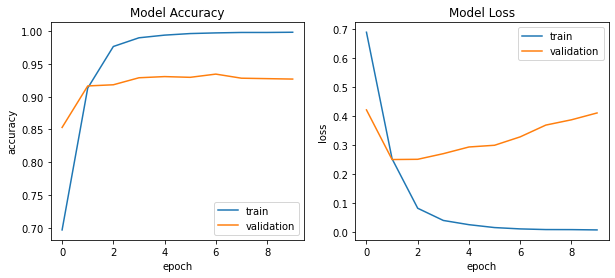

In [68]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)


In [69]:
# predict class with test set
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

Accuracy:	92.7%
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       478
           1       0.92      0.96      0.94      1782
           2       0.95      0.95      0.95      2224

    accuracy                           0.93      4484
   macro avg       0.90      0.87      0.88      4484
weighted avg       0.93      0.93      0.93      4484



2    2224
1    1782
0     478
dtype: int64
2    2228
1    1841
0     415
dtype: int64


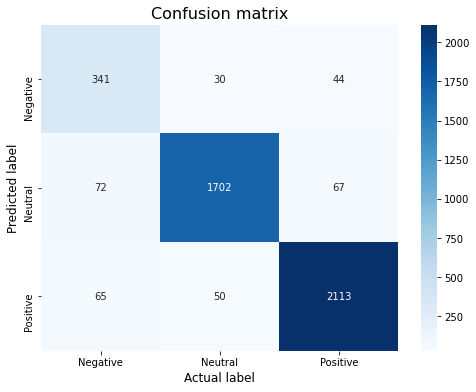

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative','Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)

# LSTM

In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleaned_tweets'][0])
X, tokenizer = tokenize_pad_sequences(df['cleaned_tweets'])
print('After Tokenization & Padding \n', X[0])


Before Tokenization & Padding 
 nice project ortcoin ort okratech bitcoin airdrop freelancer crypto dRywbnSVCo
After Tokenization & Padding 
 [ 204    5 2119 1795 2120    1   11 1735    3    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [72]:
y = pd.get_dummies(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (13452, 50) (13452, 3)
Validation Set:  (4484, 50) (4484, 3)
Test Set:  (4484, 50) (4484, 3)


In [73]:
import tensorflow.keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import History
from tensorflow.keras import losses

In [75]:
vocab_size = 5000
embedding_size = 32
epochs = 50
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

In [76]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [77]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', Precision(), Recall()])

In [78]:
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/50
106/106 [==============================] - 14s 59ms/step - loss: 0.9671 - accuracy: 0.5048 - precision: 0.5246 - recall: 0.1401 - val_loss: 0.9523 - val_accuracy: 0.4931 - val_precision: 0.7368 - val_recall: 0.0031
Epoch 2/50
106/106 [==============================] - 4s 33ms/step - loss: 0.9439 - accuracy: 0.5155 - precision: 0.5798 - recall: 0.2458 - val_loss: 0.9389 - val_accuracy: 0.5435 - val_precision: 0.6586 - val_recall: 0.2801
Epoch 3/50
106/106 [==============================] - 4s 36ms/step - loss: 0.9234 - accuracy: 0.5715 - precision: 0.6338 - recall: 0.3354 - val_loss: 0.9068 - val_accuracy: 0.5928 - val_precision: 0.6483 - val_recall: 0.4485
Epoch 4/50
106/106 [==============================] - 4s 34ms/step - loss: 0.8963 - accuracy: 0.6010 - precision: 0.6428 - recall: 0.4682 - val_loss: 0.8866 - val_accuracy: 0.6024 - val_precision: 0.6313 - val_recall: 0.5087
Epoch 5/50
106/106 [==============================] - 4s 35ms/step - loss: 0.8862 - accuracy: 0.608

106/106 [==============================] - 3s 29ms/step - loss: 0.2782 - accuracy: 0.9054 - precision: 0.9244 - recall: 0.8831 - val_loss: 0.4084 - val_accuracy: 0.8608 - val_precision: 0.8894 - val_recall: 0.8390
Epoch 38/50
106/106 [==============================] - 4s 34ms/step - loss: 0.2711 - accuracy: 0.9086 - precision: 0.9283 - recall: 0.8851 - val_loss: 0.4425 - val_accuracy: 0.8564 - val_precision: 0.8694 - val_recall: 0.8450
Epoch 39/50
106/106 [==============================] - 4s 34ms/step - loss: 0.2687 - accuracy: 0.9095 - precision: 0.9285 - recall: 0.8877 - val_loss: 0.4067 - val_accuracy: 0.8675 - val_precision: 0.8858 - val_recall: 0.8495
Epoch 40/50
106/106 [==============================] - 4s 34ms/step - loss: 0.2584 - accuracy: 0.9132 - precision: 0.9317 - recall: 0.8889 - val_loss: 0.4044 - val_accuracy: 0.8664 - val_precision: 0.8858 - val_recall: 0.8508
Epoch 41/50
106/106 [==============================] - 4s 34ms/step - loss: 0.2544 - accuracy: 0.9170 - prec

In [79]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8769
Precision : 0.8906
Recall    : 0.8622
F1 Score  : 0.8761


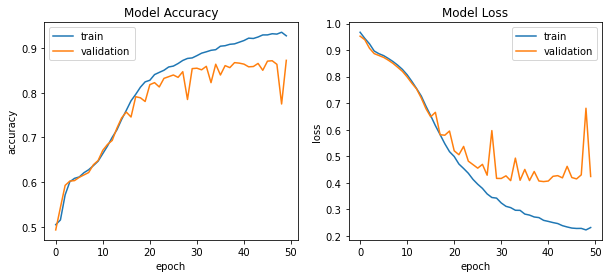

In [80]:
plot_training_hist(history)

2    2195
1    1833
0     456
dtype: int64
2    2246
1    1952
0     286
dtype: int64


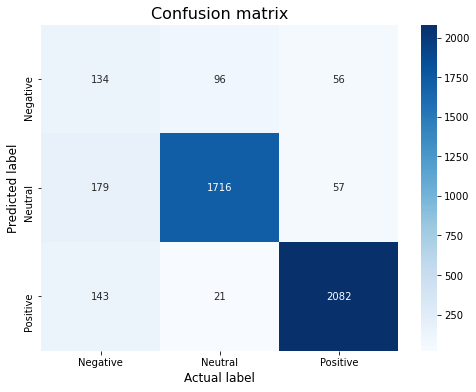

In [81]:
plot_confusion_matrix(model, X_test, y_test)